# Aykırı değer tespiti ve eleme
* Aykırı değerler: Veri setibib genelinden önemli ölçüde farklı olan gözlemler
* Neden Önemli?
  * İstatisksel analizleri etkieleyebilri ( portalama sandart sapma )
  * Model perfomansını düşürebilir.
  * yöntemler:
    * Görselleştirme
      * Kutu grafikleri ( sns.boxplot() )
      * Histogramlar ( sns.histplot() )
      * Saçılım grafikleri ( sns.scatterplot() )
    * İstatksel yönetemler
      * Z-Score bir değerin ortalamadan kaç sranart sapma uzakrta olduğunu ölçer
      * IQR ( çeyrekler arası aralık) verinin orta yüzde ellisini kapsayan aralık
  * Eleme aykırı değerleri veri setinden

Marjinal aykırı değerlerle başa çıkma
* Veri setindeki diğer gözlemlerden önemli ölçüde farklı uç değerlerdir
* Dağılımn kuyruklarında yer alırlar
* Neden önemlidir?
  * istatistiksel analizleri etkileyebilir ( ortlama,standart sapma).
  * Model performansını bozabilir
  * Yanlış sonuçlara yol açabilir

Aykırı değerleri tespit etme - görselleştirme yöntemleri
* Kutu grafikleri ( sns.boxplot() ): verini dağılımını çeyrekliler medyan ve aykuru değerler cinsinden gösterir.
* Histogramlar ( sns.histplot() ): verinin dağılımını frekans tabanlı gösterir.
* Saçılım grafikleri ( sns.scatterplot() ): iki değişken arasındaki ilişkiyi gösterir ve aykırı değerleri görsel olarak ortaya çıkarabilir.

Aykırı değerleri tespit etme - istatiskler yöntemler
* Z-Score: bir değerin ortalamadan kaç standart sapma uzaklıkta olduğunu ölçer.
  * Z-Score = (x - ortalama) / standart sapma
  * Genellikle Z-Score > 3 veya Z-Score < -3 olan değerler aykırı olarak kabul edilir.
* IQR (Çeyrekler Arası Aralık): verinin orta yüzde ellisini kapsayan aralık
  * Q1: 1. çeyrek ( %25)
  * Q3: 3. çeyrek ( %75)
  * IQR = Q3 - Q1
  * Aykırı değerler: Q1 - 1.5 * IQR ve Q3 + 1.5 * IQR dışındaki değerlerdir.

Aykırı değerleri tespit etme - Aykırı değerleri dönüştürme veya budama
* Dönüştürme:
  * Log dönüşümü: Sağa çarpık veriler daha simetrij hale getirerek aykırı değerlerin etkisini azalabilir
    * Formül: y = log(X)
  * Karekök Dönüşümü: Log dönüşümüne benzer şekilde sağa çarpıklığı azalbilir
    * Formül: y = kökx
* Budama:
  * Winsorizing aykırı değeleri beliri bir aralıktaki en yakın değerlere değişitmre
    * Formül: if x < Q1 - 1.5 * IQR: x = Q1 - 1.5 * IQR
* Trimming: Aykırı değerleri veri setinden çıkarmak
  * Formül: if x < Q1 - 1.5 * IQR or x > Q3 + 1.5 * IQR: drop x

Aykırı değerleri tespit etme - Robust istatiskler yöntemler kullanma
* aykırı değerlere karşı daha dayanıklı olan istatiksel yöntemleri tercih etme
* örnekler: ortalama yerine medtan kullanma: medyan aykırı değerlrden daha az etkilenir
* standart sapma yerine iqr kullanma iqr aykırı değerlenden daha az etkilenir
* Robust ölçeklendirme yöntemleri ( RobustScaler ) kullanma


# Aykırı Değerleri Tespit Etme


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [6]:
# Örnek DataFrame
data = {'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
        'B': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 100]}
df = pd.DataFrame(data)

print("Orijinal DataFrame:\n", df)

Orijinal DataFrame:
      A    B
0    1   10
1    2   11
2    3   12
3    4   13
4    5   14
5    6   15
6    7   16
7    8   17
8    9   18
9   10   19
10  20  100


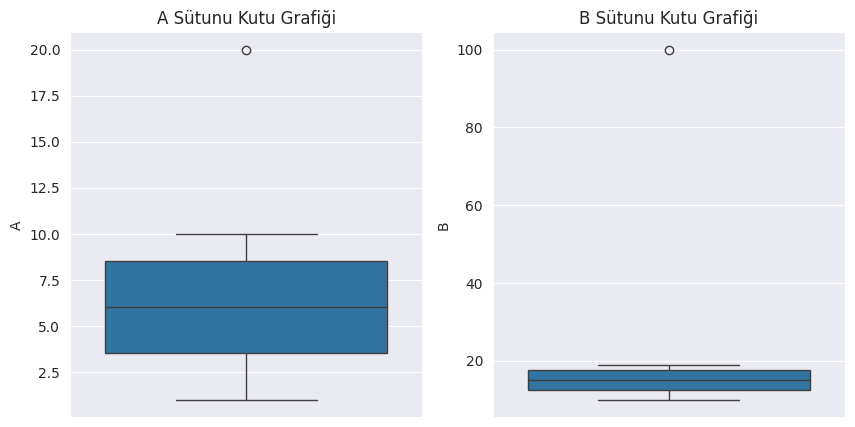

In [7]:
# Aykırı değer tespiti (kutu grafikleri)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['A'])
plt.title('A Sütunu Kutu Grafiği')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['B'])
plt.title('B Sütunu Kutu Grafiği')
plt.show()

In [8]:
# Aykırı değer tespiti (z-skorları)
z_a = np.abs(stats.zscore(df['A']))
z_b = np.abs(stats.zscore(df['B']))
print("\nA Sütunu Z-skorları:\n", z_a)
print("\nB Sütunu Z-skorları:\n", z_b)


A Sütunu Z-skorları:
 [1.16653219 0.96603447 0.76553675 0.56503903 0.36454131 0.16404359
 0.03645413 0.23695185 0.43744957 0.63794729 2.64292449]

B Sütunu Z-skorları:
 [0.49623634 0.45580227 0.4153682  0.37493412 0.33450005 0.29406598
 0.25363191 0.21319784 0.17276376 0.13232969 3.14283016]


In [9]:
# Aykırı değer tespiti (IQR)
Q1_A = df['A'].quantile(0.25)
Q3_A = df['A'].quantile(0.75)
IQR_A = Q3_A - Q1_A
print("\nA Sütunu IQR:", IQR_A)

Q1_B = df['B'].quantile(0.25)
Q3_B = df['B'].quantile(0.75)
IQR_B = Q3_B - Q1_B
print("\nB Sütunu IQR:", IQR_B)


A Sütunu IQR: 5.0

B Sütunu IQR: 5.0


# Aykırı değerleri Dönüştürme veya Budama

In [10]:
# Aykırı Değerleri Dönüştürme veya Budama
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Örnek DataFrame
data = {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50]}
df = pd.DataFrame(data)

print("Orijinal DataFrame:\n", df)

Orijinal DataFrame:
      C
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
9   10
10  50


Text(0.5, 1.0, 'Orijinal Dağılım')

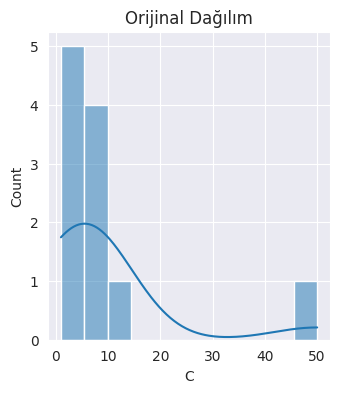

In [12]:
# Orijinal dağılım
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['C'], kde=True)
plt.title('Orijinal Dağılım')

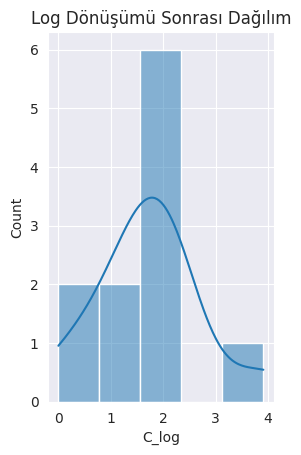


Log Dönüşümü Sonrası DataFrame:
      C     C_log
0    1  0.000000
1    2  0.693147
2    3  1.098612
3    4  1.386294
4    5  1.609438
5    6  1.791759
6    7  1.945910
7    8  2.079442
8    9  2.197225
9   10  2.302585
10  50  3.912023


In [13]:
# Log dönüşümü
df['C_log'] = df['C'].apply(np.log)
plt.subplot(1, 2, 2)
sns.histplot(df['C_log'], kde=True)
plt.title('Log Dönüşümü Sonrası Dağılım')
plt.show()

print("\nLog Dönüşümü Sonrası DataFrame:\n", df)

In [14]:
# Winsorizing
from scipy.stats import iqr

alt_sinir = np.percentile(df['C'], 10)
ust_sinir = np.percentile(df['C'], 90)
# 90 ve 10 arasındaki değerleri alır ve kesmeden en yakın değerlere değiştirir
df['C_winsorized'] = np.clip(df['C'], alt_sinir, ust_sinir)
print("\nWinsorized DataFrame:\n", df)


Winsorized DataFrame:
      C     C_log  C_winsorized
0    1  0.000000             2
1    2  0.693147             2
2    3  1.098612             3
3    4  1.386294             4
4    5  1.609438             5
5    6  1.791759             6
6    7  1.945910             7
7    8  2.079442             8
8    9  2.197225             9
9   10  2.302585            10
10  50  3.912023            10


In [15]:
# Trimming
df_trimmed = df[(df['C'] > alt_sinir) & (df['C'] < ust_sinir)]
print("\nTrimmed DataFrame:\n", df_trimmed)


Trimmed DataFrame:
    C     C_log  C_winsorized
2  3  1.098612             3
3  4  1.386294             4
4  5  1.609438             5
5  6  1.791759             6
6  7  1.945910             7
7  8  2.079442             8
8  9  2.197225             9


Robust İstatistiksel Yöntemler Kullanma

In [16]:
#Robust İstatistiksel Yöntemler Kullanma
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

In [17]:
# Örnek DataFrame
data = {'D': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]}
df = pd.DataFrame(data)

print("Orijinal DataFrame:\n", df)

Orijinal DataFrame:
       D
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
10  100


In [18]:
# Ortalama ve Medyan Karşılaştırma
ortalama = df['D'].mean()
medyan = df['D'].median()
print("\nOrtalama:", ortalama)
print("Medyan:", medyan)


Ortalama: 14.090909090909092
Medyan: 6.0


In [19]:
# Standart Sapma ve IQR Karşılaştırma
standart_sapma = df['D'].std()
Q1 = df['D'].quantile(0.25)
Q3 = df['D'].quantile(0.75)
IQR = Q3 - Q1
print("\nStandart Sapma:", standart_sapma)
print("IQR:", IQR)


Standart Sapma: 28.637229424141385
IQR: 5.0


In [20]:
# RobustScaler Uygulama
scaler = RobustScaler()
df['D_robust_scaled'] = scaler.fit_transform(df[['D']])
print("\nRobust Scaled DataFrame:\n", df)


Robust Scaled DataFrame:
       D  D_robust_scaled
0     1             -1.0
1     2             -0.8
2     3             -0.6
3     4             -0.4
4     5             -0.2
5     6              0.0
6     7              0.2
7     8              0.4
8     9              0.6
9    10              0.8
10  100             18.8
